BigMac Index

Dataset: BigMacPrice --> https://www.kaggle.com/datasets/vittoriogiatti/bigmacprice?resource=download

PPI: https://data.oecd.org/price/producer-price-indices-ppi.htm#indicator-chart

Questions:
- Can we predict (some price indicator)
- How did the price develop
- Does it grow at the same pace
- Does the exchange rate reflect the price difference

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pycountry
%matplotlib inline

df_bigmac = pd.read_csv('BigMacPrice.csv')
df_bigmac.head()

date currency_code       name  local_price  dollar_ex  dollar_price
0  2000-04-01           ARS  Argentina         2.50          1          2.50
1  2000-04-01           AUD  Australia         2.59          1          2.59
2  2000-04-01           BRL     Brazil         2.95          1          2.95
3  2000-04-01           GBP    Britain         1.90          1          1.90
4  2000-04-01           CAD     Canada         2.85          1          2.85

In [2]:
df_ppi = pd.read_csv('DP_LIVE_23112022084950389.csv')
df_ppi.head()

LOCATION INDICATOR   SUBJECT MEASURE FREQUENCY  TIME     Value  Flag Codes
0      AUT       PPI  DOMESTIC  AGRWTH         A  2000  3.405336         NaN
1      AUT       PPI  DOMESTIC  AGRWTH         A  2001  0.048577         NaN
2      AUT       PPI  DOMESTIC  AGRWTH         A  2002 -1.408040         NaN
3      AUT       PPI  DOMESTIC  AGRWTH         A  2003  0.285630         NaN
4      AUT       PPI  DOMESTIC  AGRWTH         A  2004  2.219603         NaN

In [3]:
def map_country(country_str):
        try:
            return pycountry.countries.lookup(country_str).name
        except LookupError:
            return None
        except Exception as e:
            return e

def clean_ppi(df_ppi, measure):
    # Filter PPI
    f1 = df_ppi.TIME.str.contains("-")
    f2 = df_ppi.TIME.str.contains('Q')
    f3 = df_ppi.SUBJECT == "DOMESTIC"
    f4 = df_ppi.MEASURE == measure
    mask = f1 & ~f2 &  f3 & f4

    df_ppi = df_ppi[mask]

    df_ppi['TIME'] = pd.to_datetime(df_ppi['TIME'])

    df_ppi['country'] = df_ppi['LOCATION'].apply(map_country)
    df_ppi = df_ppi[~df_ppi['country'].isnull()]
    return df_ppi


df_ppi_cleaned = clean_ppi(df_ppi, "IDX2015")
df_ppi_cleaned

C:\Users\C77561\AppData\Local\Temp\ipykernel_21160\1624101518.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ppi['TIME'] = pd.to_datetime(df_ppi['TIME'])
C:\Users\C77561\AppData\Local\Temp\ipykernel_21160\1624101518.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ppi['country'] = df_ppi['LOCATION'].apply(map_country)


LOCATION INDICATOR   SUBJECT  MEASURE FREQUENCY       TIME      Value  \
53558      AUT       PPI  DOMESTIC  IDX2015         M 2000-01-01   80.33244   
53559      AUT       PPI  DOMESTIC  IDX2015         M 2000-02-01   80.71407   
53560      AUT       PPI  DOMESTIC  IDX2015         M 2000-03-01   81.00029   
53561      AUT       PPI  DOMESTIC  IDX2015         M 2000-04-01   80.80947   
53562      AUT       PPI  DOMESTIC  IDX2015         M 2000-05-01   81.28651   
...        ...       ...       ...      ...       ...        ...        ...   
83860      CRI       PPI  DOMESTIC  IDX2015         M 2022-06-01  137.27710   
83861      CRI       PPI  DOMESTIC  IDX2015         M 2022-07-01  138.37300   
83862      CRI       PPI  DOMESTIC  IDX2015         M 2022-08-01  137.42050   
83863      CRI       PPI  DOMESTIC  IDX2015         M 2022-09-01  136.53100   
83864      CRI       PPI  DOMESTIC  IDX2015         M 2022-10-01  136.12100   

       Flag Codes     country  
53558         NaN     Austria  
53559         NaN     Austria  
53560         NaN     Austria  
53561         NaN     Austria  
53562         NaN     Austria  
...           ...         ...  
83860         NaN  Costa Rica  
83861         NaN  Costa Rica  
83862         NaN  Costa Rica  
83863         NaN  Costa Rica  
83864         NaN  Costa Rica  

[17054 rows x 9 columns]

In [5]:
df_bigmac = pd.read_csv('BigMacPrice.csv')

def clean_df_bigmac(df_bigmac):
    # Use same mapping as for df_ppi
    df_bigmac['country'] = df_bigmac.name.apply(map_country)
    # Few countries unable to map in pycountry - so do manually
    remap = {'Britain': 'United Kingdom',
             'Russia': 'Russian Federation',
             'UAE': 'United Arab Emirates'}
    df_bigmac['country'] = df_bigmac['name'].replace(remap)
    
    # Seems to be an error in consistency of the date column for the given dates
    df_bigmac.loc[df_bigmac.date == "2019-07-09", "date"] = "2019-07-01"
    df_bigmac.loc[df_bigmac.date == "2020-01-14", "date"] = "2020-01-01"
    
    # Set col date col to datetime for joining purposes
    df_bigmac['date'] = pd.to_datetime(df_bigmac['date'])
    
    return df_bigmac

df_bigmac = clean_df_bigmac(df_bigmac)
df_bigmac

date currency_code                  name  local_price  dollar_ex  \
0    2000-04-01           ARS             Argentina         2.50          1   
1    2000-04-01           AUD             Australia         2.59          1   
2    2000-04-01           BRL                Brazil         2.95          1   
3    2000-04-01           GBP               Britain         1.90          1   
4    2000-04-01           CAD                Canada         2.85          1   
...         ...           ...                   ...          ...        ...   
1941 2022-07-01           AED  United Arab Emirates        18.00          3   
1942 2022-07-01           USD         United States         5.15          1   
1943 2022-07-01           UYU               Uruguay       255.00         41   
1944 2022-07-01           VES             Venezuela        10.00          5   
1945 2022-07-01           VND               Vietnam     69000.00      23417   

      dollar_price               country  
0             2.50             Argentina  
1             2.59             Australia  
2             2.95                Brazil  
3             1.90        United Kingdom  
4             2.85                Canada  
...            ...                   ...  
1941          6.00  United Arab Emirates  
1942          5.15         United States  
1943          6.22               Uruguay  
1944          2.00             Venezuela  
1945          2.95               Vietnam  

[1946 rows x 7 columns]

In [6]:
df = pd.merge(df_bigmac, df_ppi_cleaned, left_on=['date', 'country'], right_on=['TIME', 'country'], how='left')


In [7]:
only_nulls = []
full_period = []
semi_period = []

for c in df.country.unique():
    print(30*"-")
    print(c)
    total = len(df[df.country == c])
    nulls = np.sum(df[df.country == c].LOCATION.isnull())
    print(f'Total Rows: {total}')
    print(f'Nulls: {nulls}')
    if total == nulls:
        only_nulls += [c]
    elif nulls == 0:
        full_period += [c]
    else:
        semi_period += [c]
          

------------------------------
Argentina
Total Rows: 37
Nulls: 37
------------------------------
Australia
Total Rows: 37
Nulls: 37
------------------------------
Brazil
Total Rows: 37
Nulls: 37
------------------------------
United Kingdom
Total Rows: 37
Nulls: 0
------------------------------
Canada
Total Rows: 37
Nulls: 37
------------------------------
Chile
Total Rows: 37
Nulls: 37
------------------------------
China
Total Rows: 37
Nulls: 37
------------------------------
Czech Republic
Total Rows: 37
Nulls: 37
------------------------------
Denmark
Total Rows: 36
Nulls: 0
------------------------------
Euro area
Total Rows: 37
Nulls: 37
------------------------------
Hong Kong
Total Rows: 37
Nulls: 37
------------------------------
Hungary
Total Rows: 37
Nulls: 0
------------------------------
Indonesia
Total Rows: 37
Nulls: 37
------------------------------
Israel
Total Rows: 28
Nulls: 0
------------------------------
Japan
Total Rows: 37
Nulls: 0
------------------------------

In [8]:
print(f"No PPI Data: {len(only_nulls)}")
print(f"PPI Data full period: {len(full_period)}")
print(f"Partly PPI data: {len(semi_period)}")

No PPI Data: 42
PPI Data full period: 30
Partly PPI data: 1


In [9]:
df.name.value_counts()

Argentina               37
Japan                   37
United States           37
Thailand                37
Taiwan                  37
                        ..
Jordan                   9
Honduras                 9
Guatemala                9
Croatia                  9
United Arab Emirates     9
Name: name, Length: 74, dtype: int64

In [10]:
df = pd.merge(df_bigmac, df_ppi_cleaned, left_on=['date', 'country'], right_on=['TIME', 'country'], how='left')

df = df.set_index('date')
df_comparison = df[df['country'] == "United States"]

df = df.join(df_comparison[['local_price']], how='left', rsuffix="_comparison")
df['expected_price'] = df['local_price_comparison'] * df['dollar_ex']

df['diff_local'] = df['local_price'] - df['expected_price']
df['diff_dollar'] = df['dollar_price'] - df['local_price_comparison']

# plt.plot(df2.index, df2.dollar_price)
# plt.plot(df2.index, df2.local_price_comparison)
# plt.legend(['local price ($)', 'Dollar price USA'])
# plt.title(f'Price flow for Argentina')
# plt.show()

In [11]:
import seaborn as sns

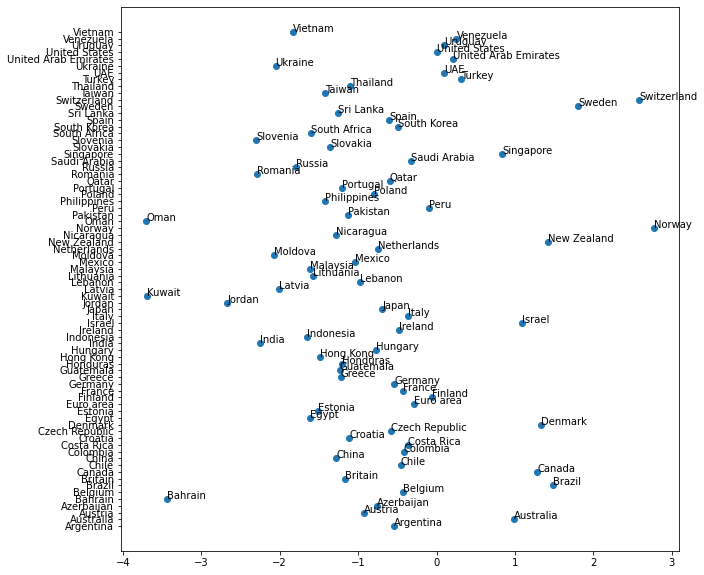

In [16]:
df_grouped = df[['diff_dollar', 'name']].groupby('name').aggregate([np.mean])
x=df_grouped[('diff_dollar', 'mean')]
y=df_grouped.index

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y)

for i, txt in enumerate(df_grouped.index):
    ax.annotate(txt, (x[i], y[i]))

<AxesSubplot:xlabel='date', ylabel='diff_dollar'>

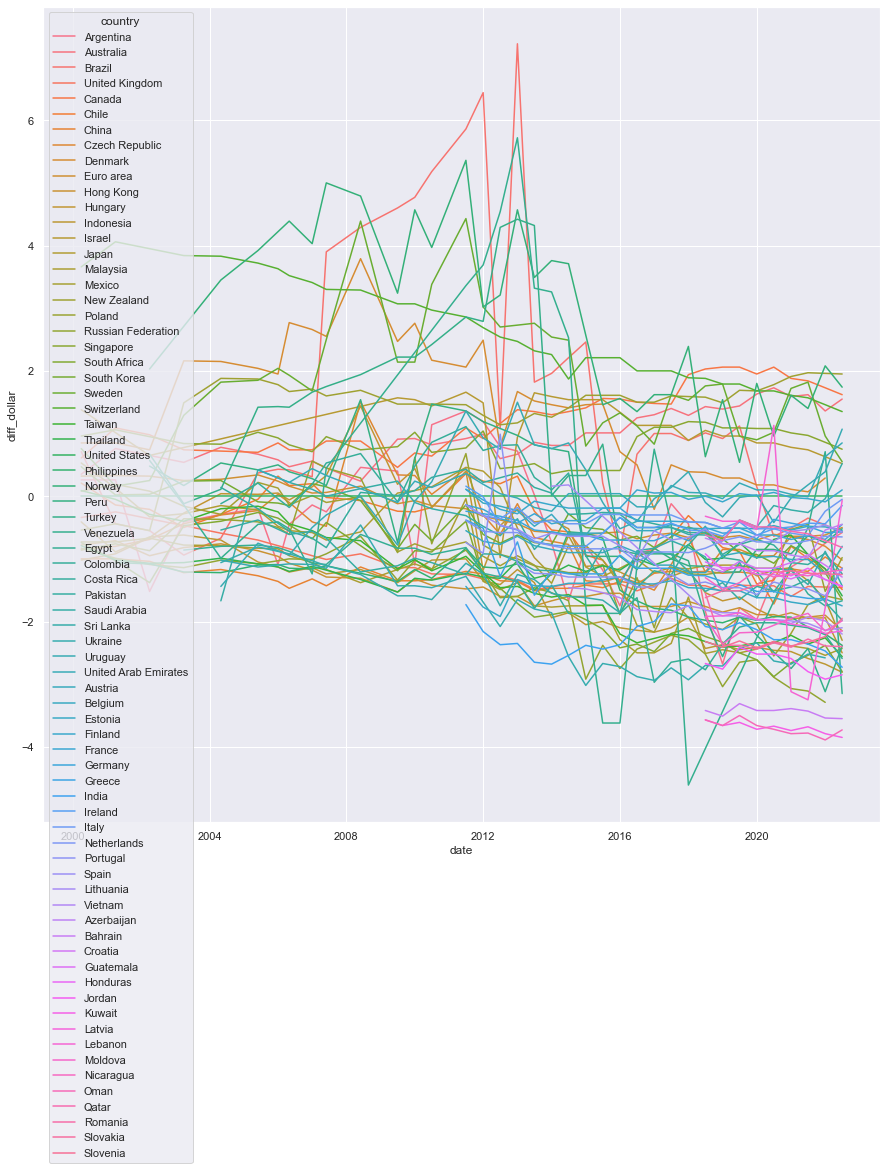

In [24]:
test = df.reset_index()
sns.set(rc={'figure.figsize': (15, 15)})
sns.lineplot(data=test, x='date', y='diff_dollar', hue='country')

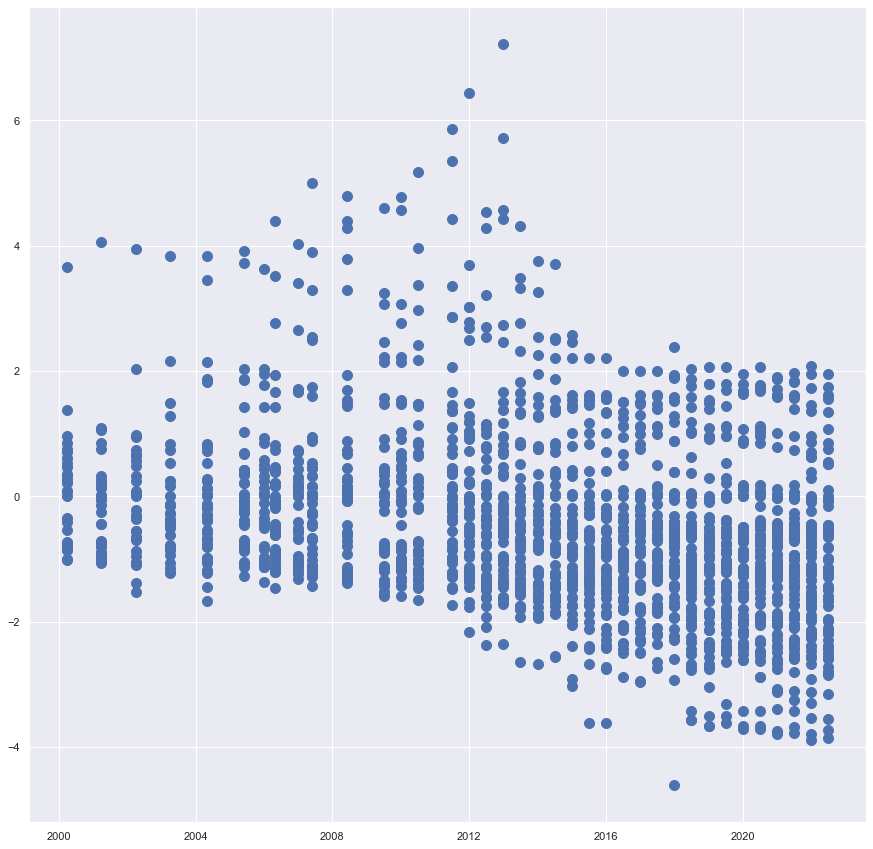

In [25]:
import matplotlib.animation as animation


def main():
    numframes = 100
    numpoints = 10
    x = test.date
    y = test.diff_dollar
    
    fig = plt.figure()
    scat = plt.scatter(x, y, s=100)
    
    ani = animation.FuncAnimation(fig, update_plot, frames=(range(numframes)))
    
    plt.show()
    
def update_plot(i, data, scat):
    scat.set_array(data[i])
    return scat,

main()

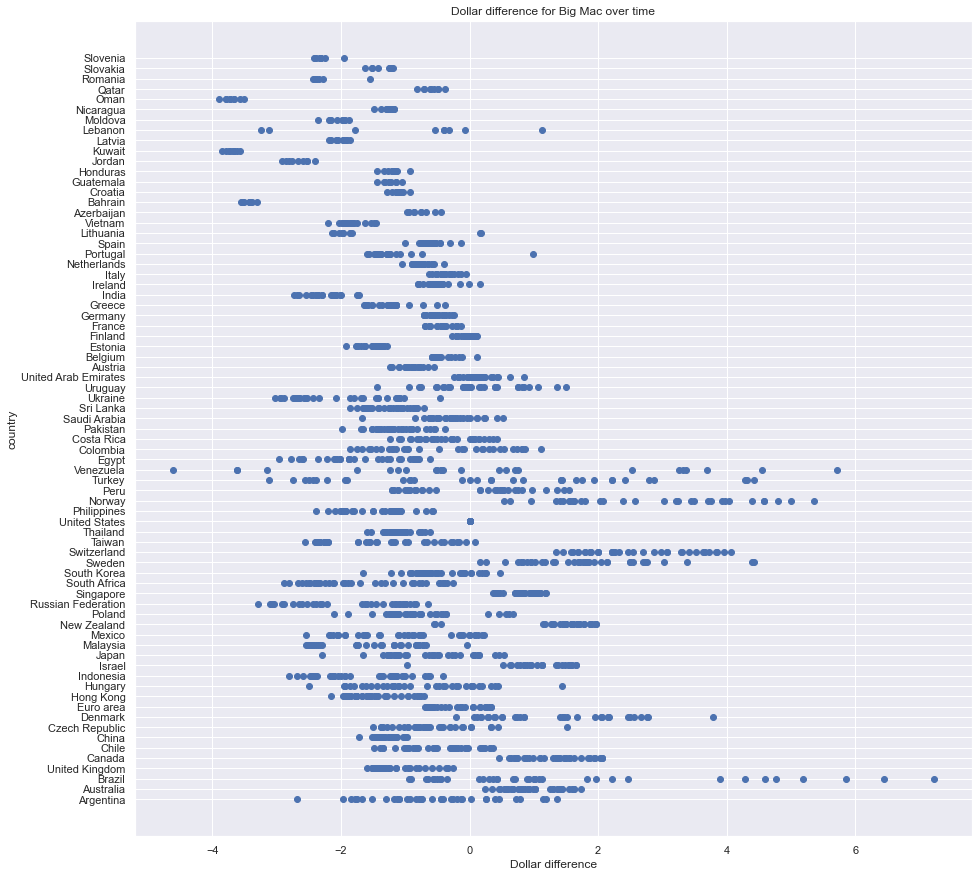

SystemExit: 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [30]:
import sys

y = test.country
x = test.diff_dollar

plt.xlabel('Dollar difference')
plt.ylabel('country')
plt.title('Dollar difference for Big Mac over time')
# plt.figsize(15,15)
plt.scatter(x, y)
plt.pause(0.01)

sys.exit(plt.show())

In [ ]:
class AnimatedScatter(object):
    def __init__(self, numpoints=50):
        self.numpoints = numpoints
        self.stream = self.data_stream()
        self.fig, self.ax = plt.subplots()
        self.ani = animation.FuncAnimation(self.fig, self.update, interval=5,
                                           init_func=self.setup_plot, blit=True)
    
    def setup_plot(self):
        x, y, s, c = next(self.stream).T
        self.scat = self.ax.scatter(x, y, c=c, s=s, vmin=0, vmax=1, cmap='jet', edgecolor='k')
        return self.scat,
    
    def data_stream(self):
        x

In [20]:
test.head()

date currency_code       name  local_price  dollar_ex  dollar_price  \
0 2000-04-01           ARS  Argentina         2.50          1          2.50   
1 2000-04-01           AUD  Australia         2.59          1          2.59   
2 2000-04-01           BRL     Brazil         2.95          1          2.95   
3 2000-04-01           GBP    Britain         1.90          1          1.90   
4 2000-04-01           CAD     Canada         2.85          1          2.85   

          country LOCATION INDICATOR   SUBJECT  MEASURE FREQUENCY       TIME  \
0       Argentina      NaN       NaN       NaN      NaN       NaN        NaT   
1       Australia      NaN       NaN       NaN      NaN       NaN        NaT   
2          Brazil      NaN       NaN       NaN      NaN       NaN        NaT   
3  United Kingdom      GBR       PPI  DOMESTIC  IDX2015         M 2000-04-01   
4          Canada      NaN       NaN       NaN      NaN       NaN        NaT   

     Value  Flag Codes  local_price_comparison  expected_price  diff_local  \
0      NaN         NaN                    2.24            2.24        0.26   
1      NaN         NaN                    2.24            2.24        0.35   
2      NaN         NaN                    2.24            2.24        0.71   
3  73.8346         NaN                    2.24            2.24       -0.34   
4      NaN         NaN                    2.24            2.24        0.61   

   diff_dollar  
0         0.26  
1         0.35  
2         0.71  
3        -0.34  
4         0.61

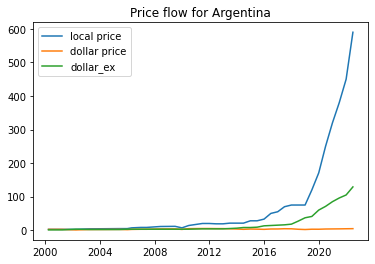

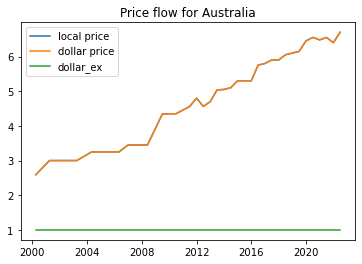

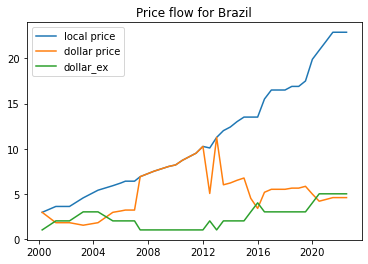

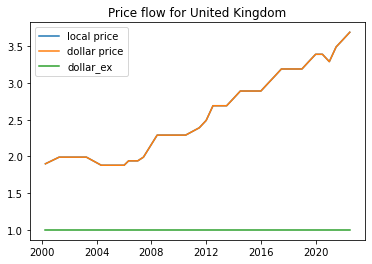

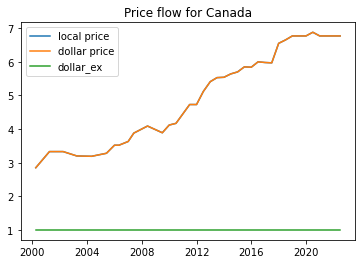

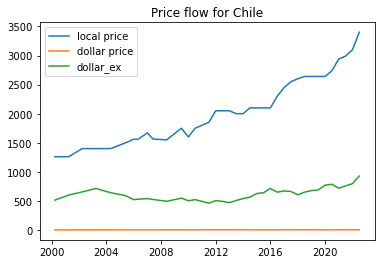

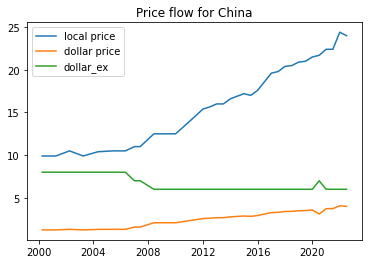

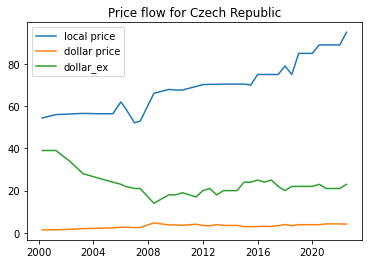

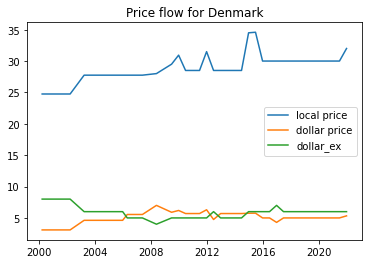

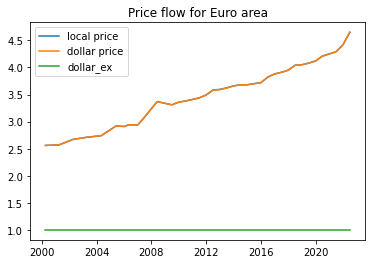

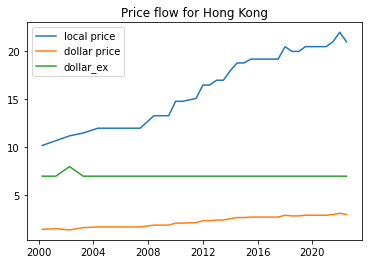

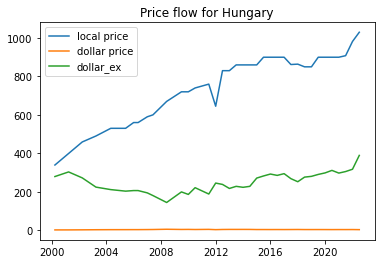

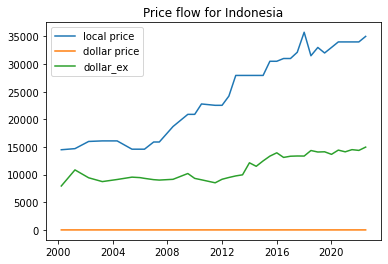

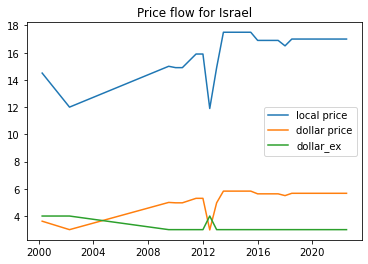

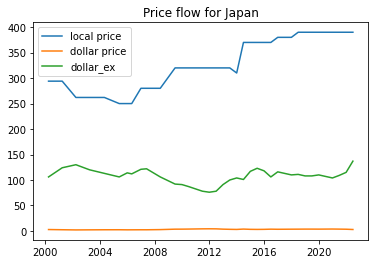

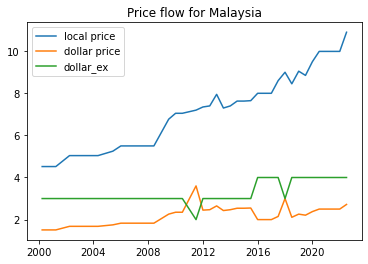

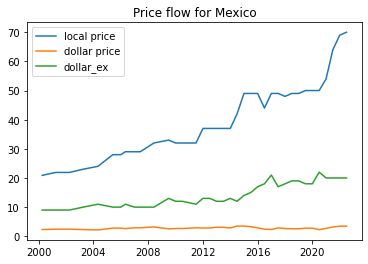

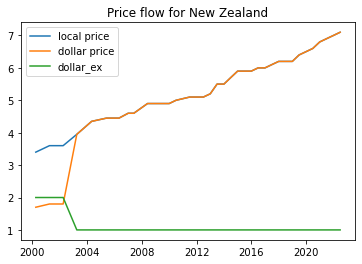

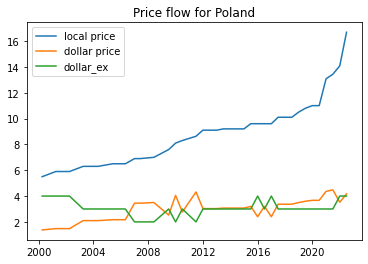

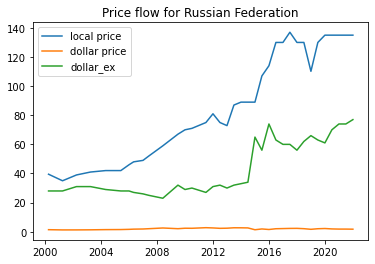

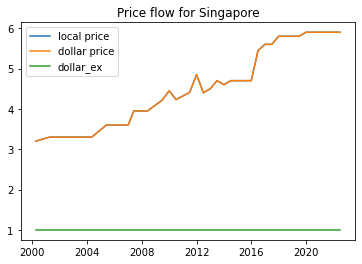

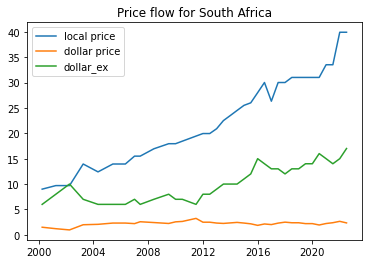

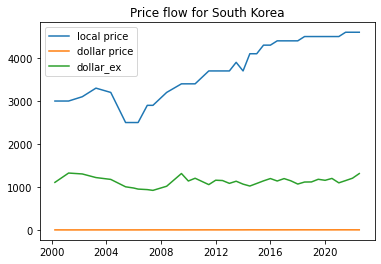

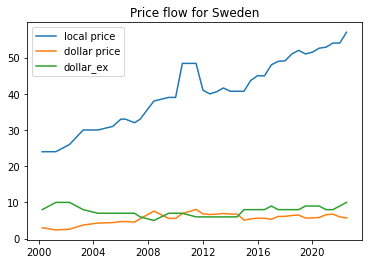

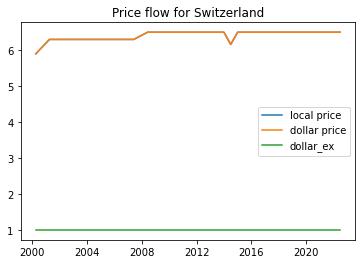

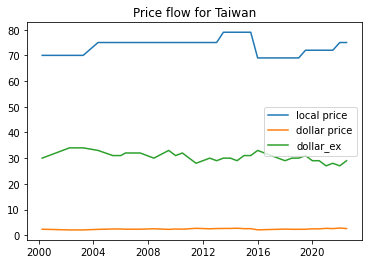

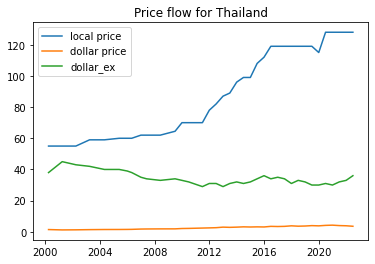

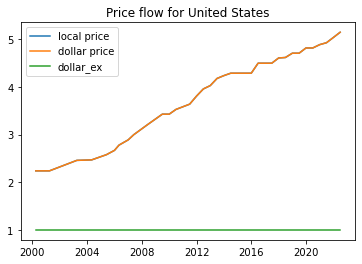

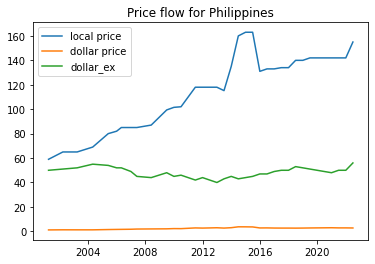

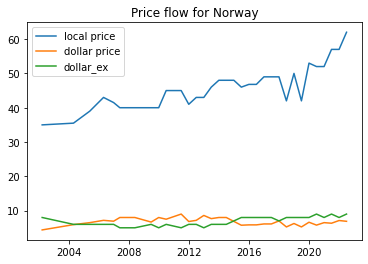

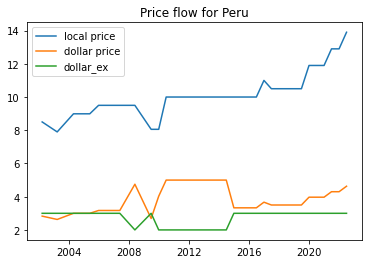

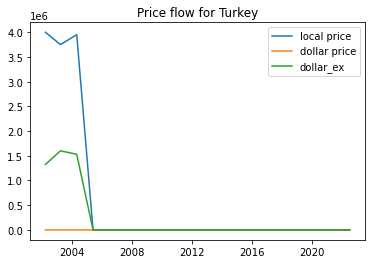

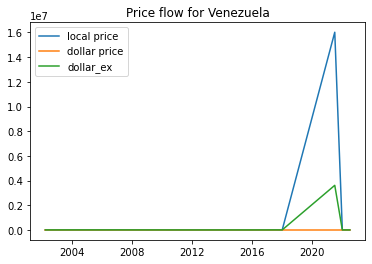

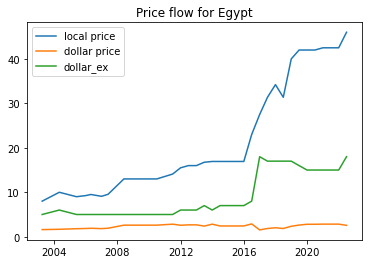

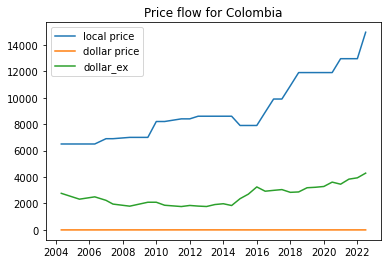

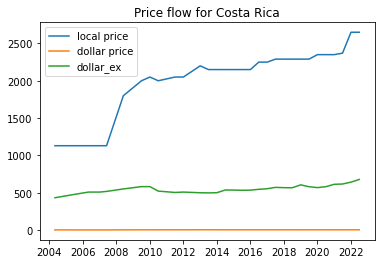

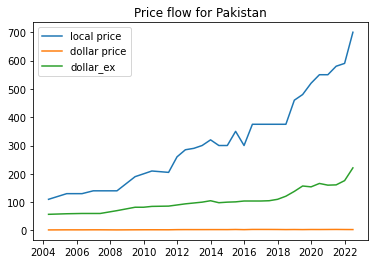

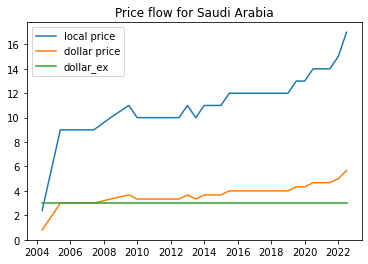

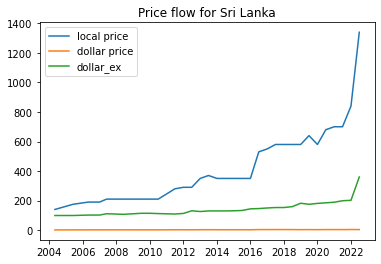

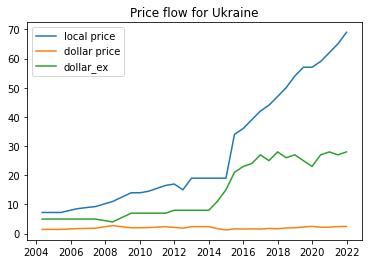

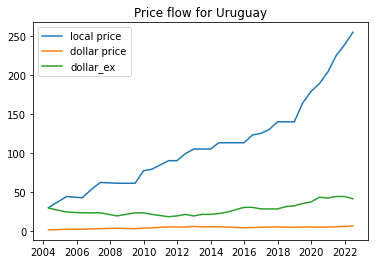

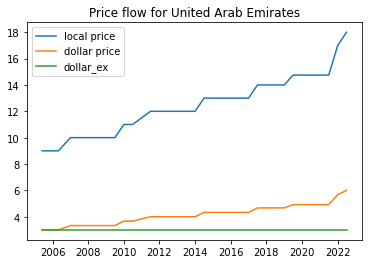

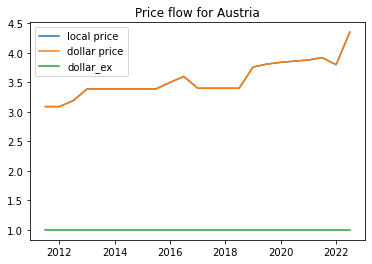

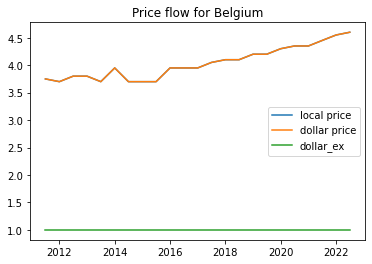

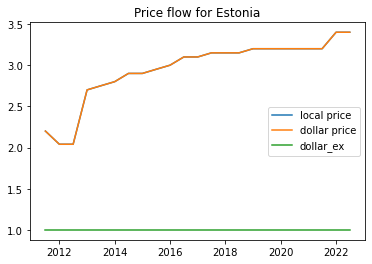

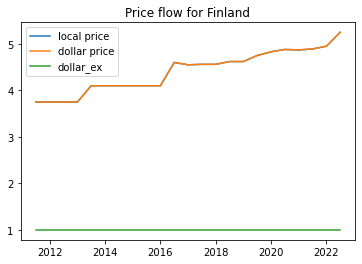

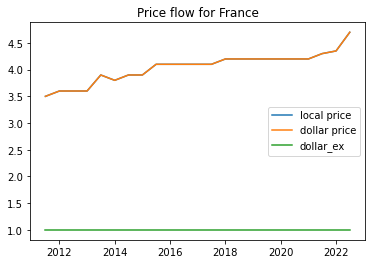

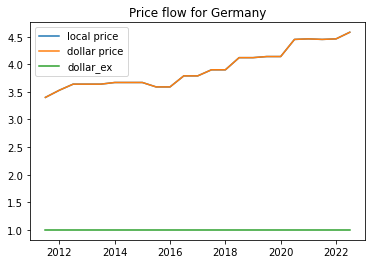

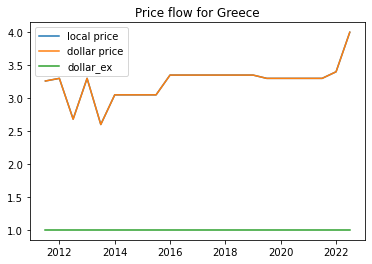

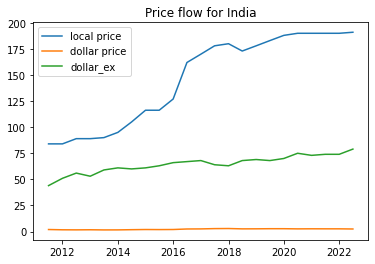

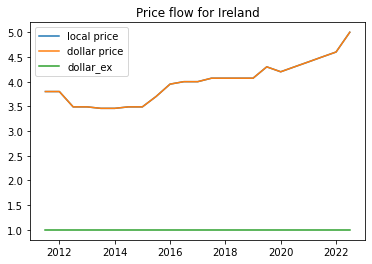

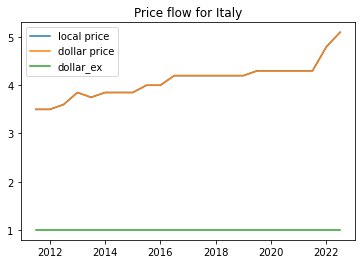

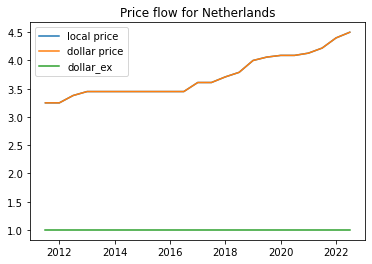

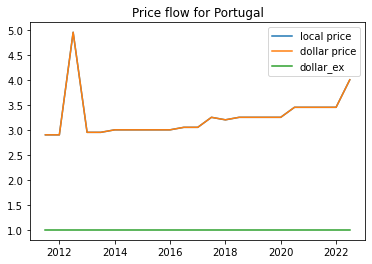

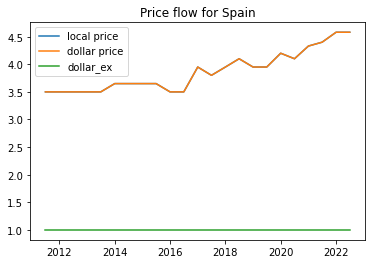

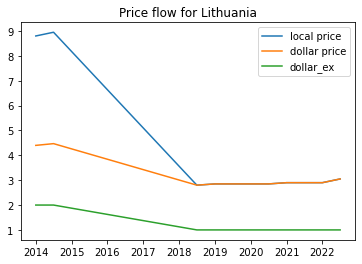

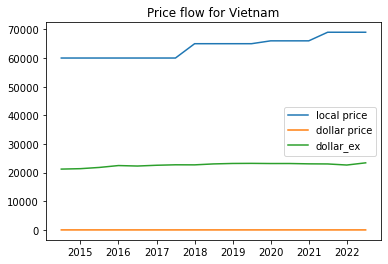

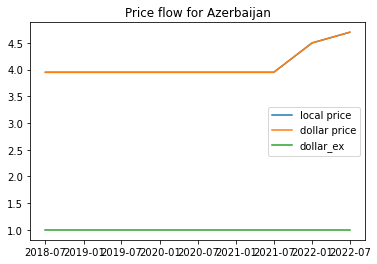

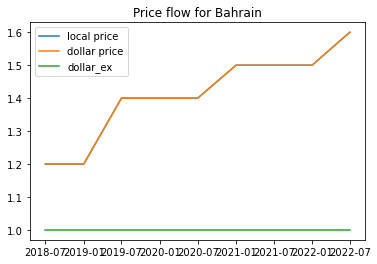

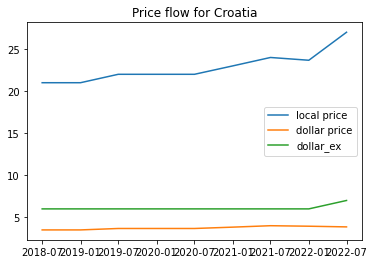

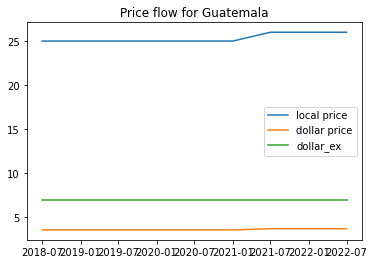

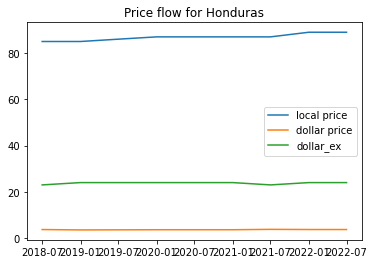

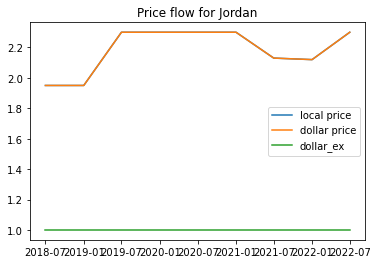

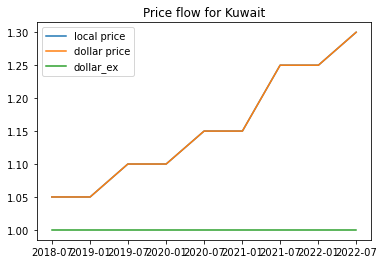

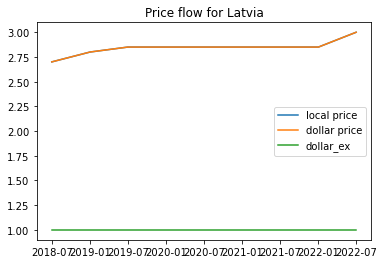

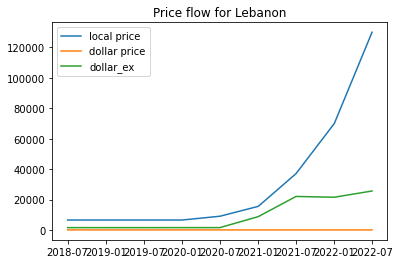

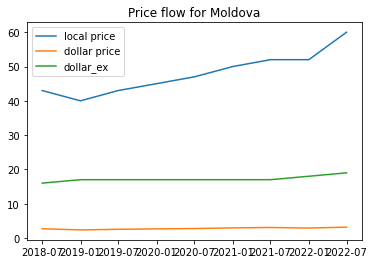

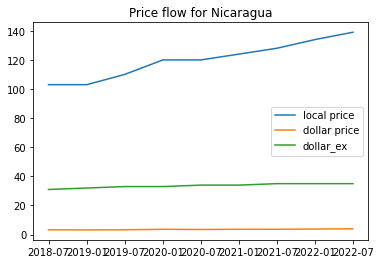

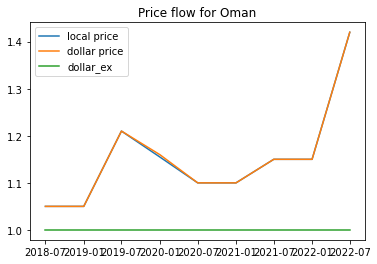

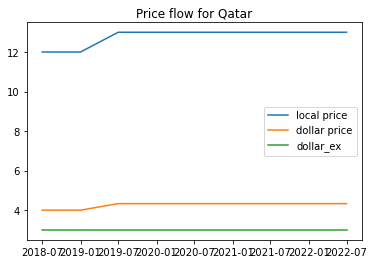

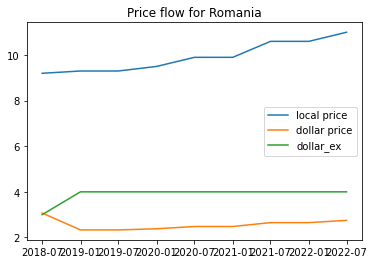

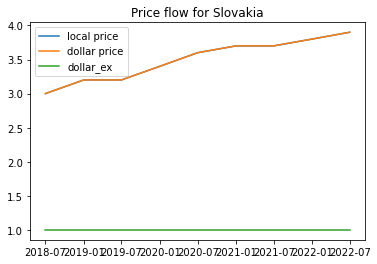

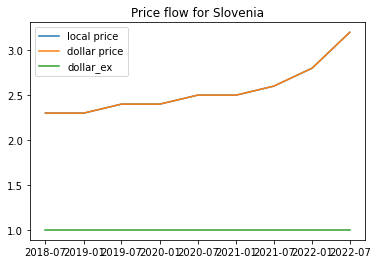

In [51]:
for c in df.country.unique():
    x = df.set_index('date')
    x = x[x['country'] == c]

    plt.plot(x.index, x.local_price)
    plt.plot(x.index, x.dollar_price)
    plt.plot(x.index, x.dollar_ex)
    plt.legend(['local price', 'dollar price', 'dollar_ex'])
    plt.title(f'Price flow for {c}')
    plt.show()

C:\Users\C77561\AppData\Local\Temp\ipykernel_24376\794015652.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, host = plt.subplots(figsize=(8,5)) # (width, height) in inches


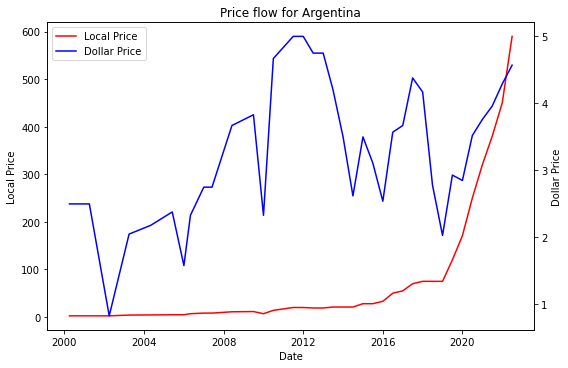

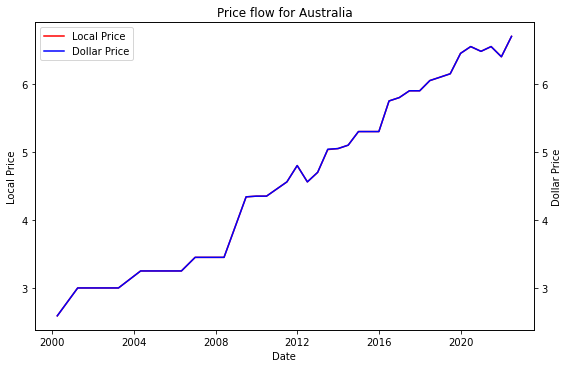

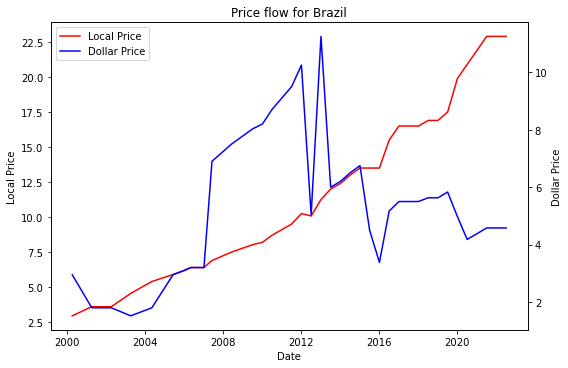

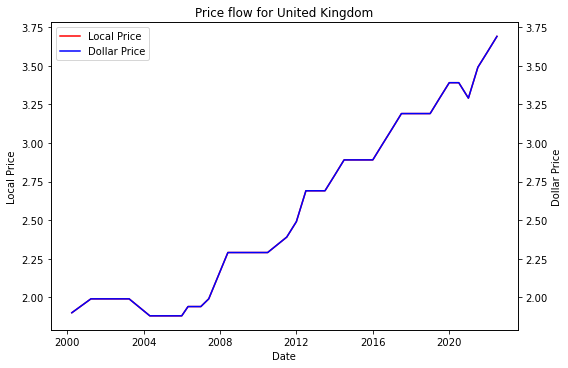

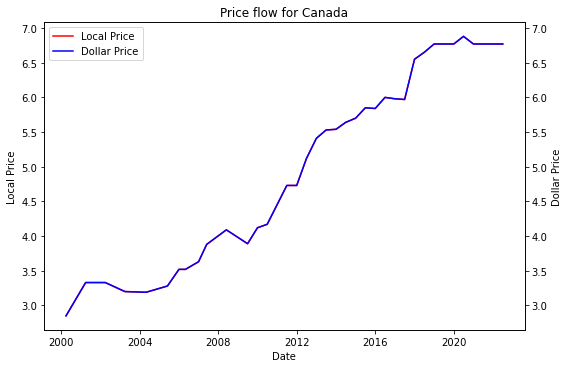

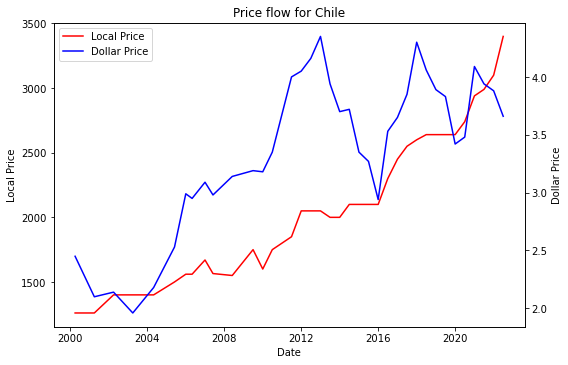

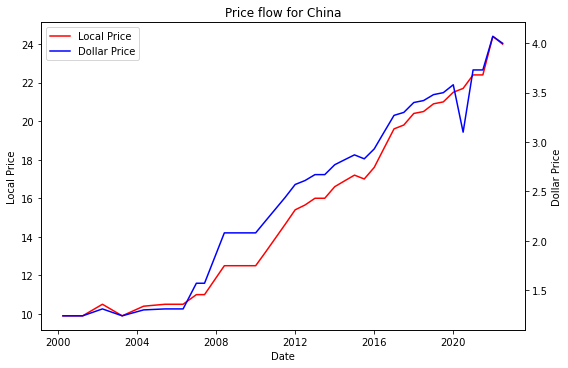

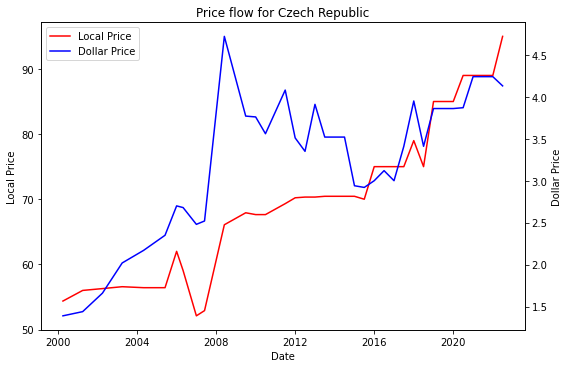

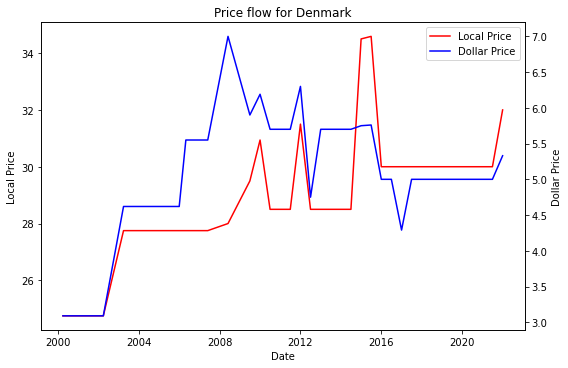

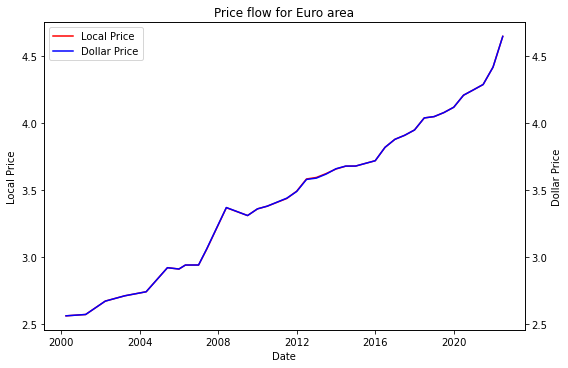

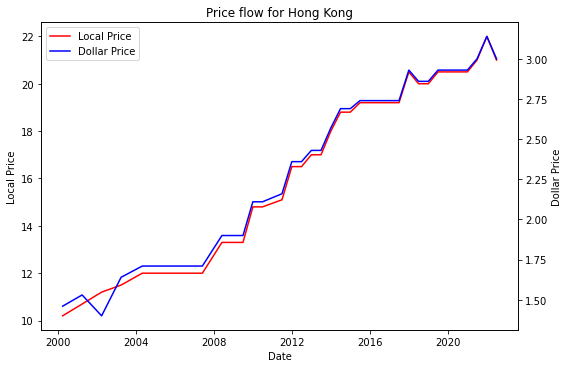

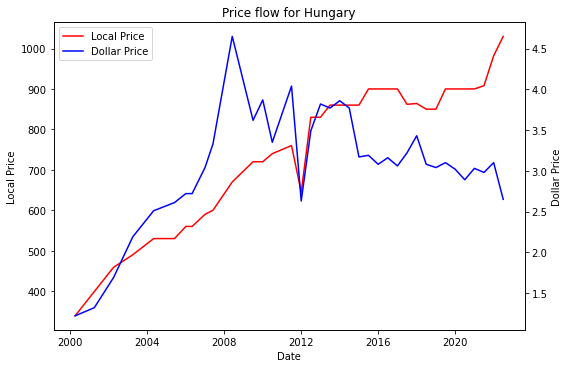

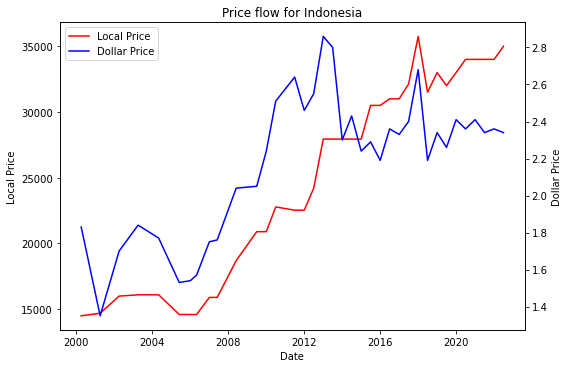

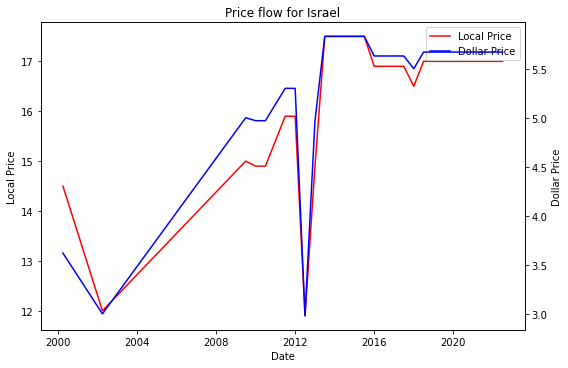

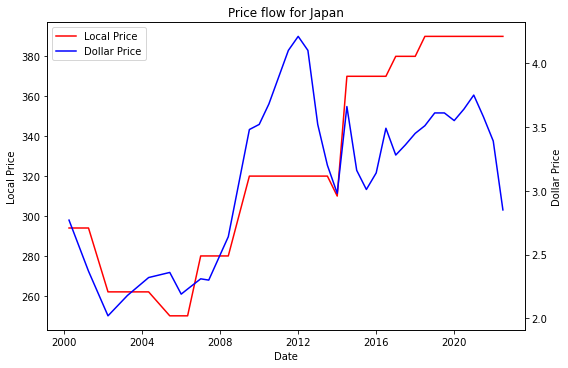

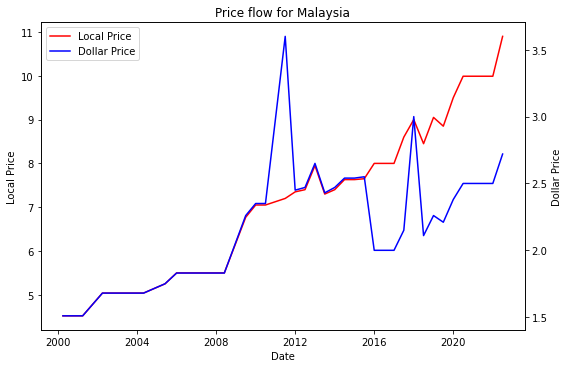

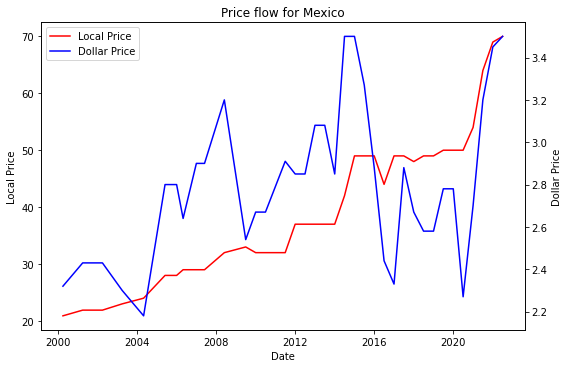

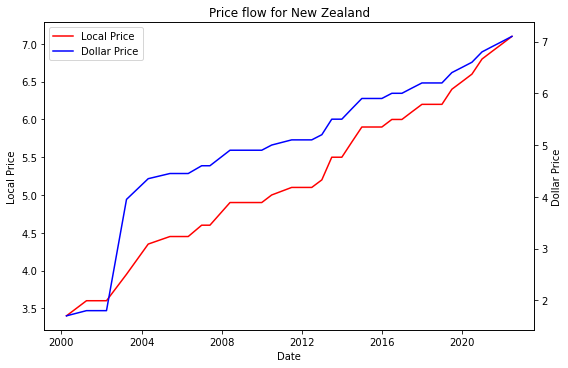

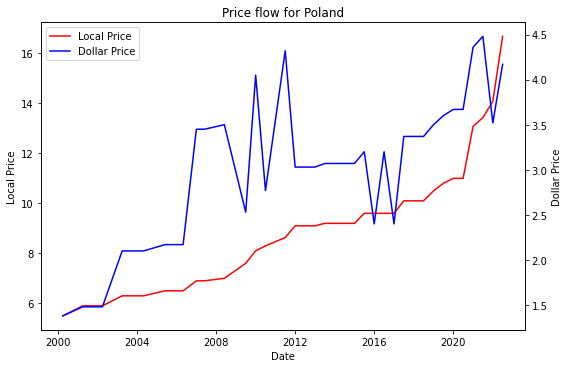

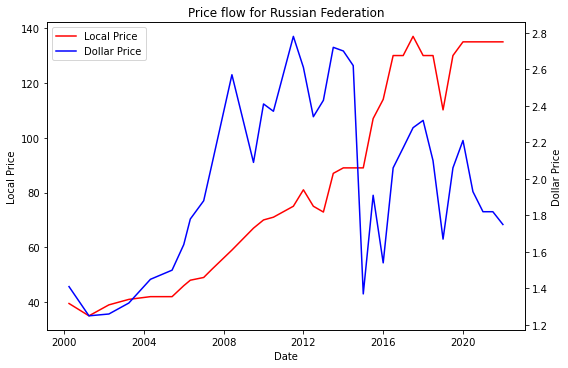

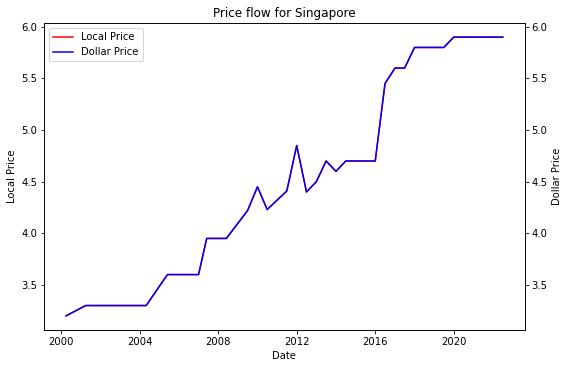

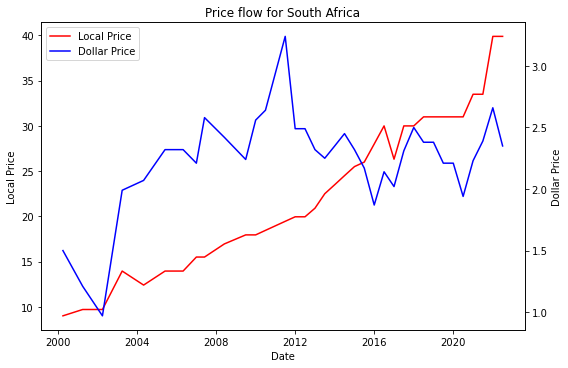

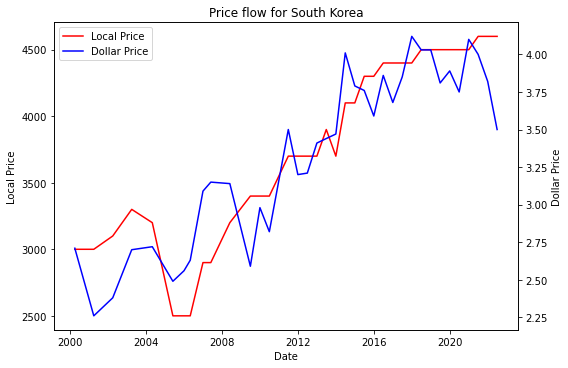

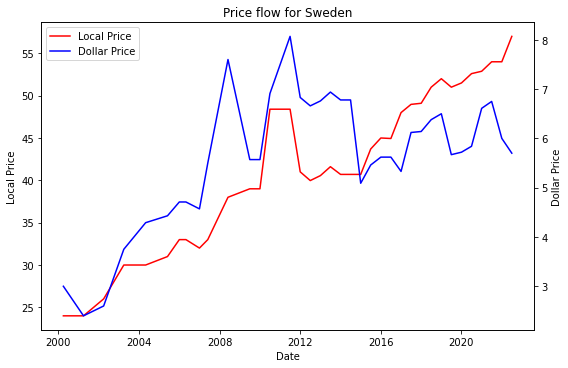

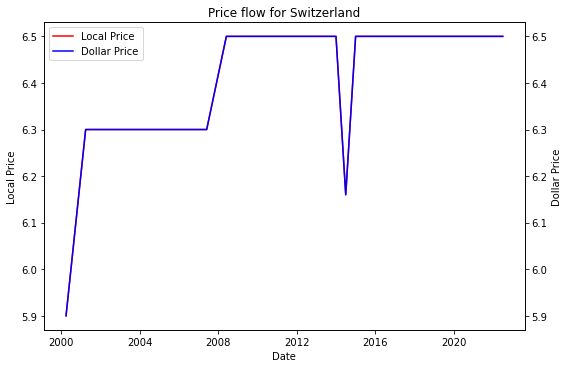

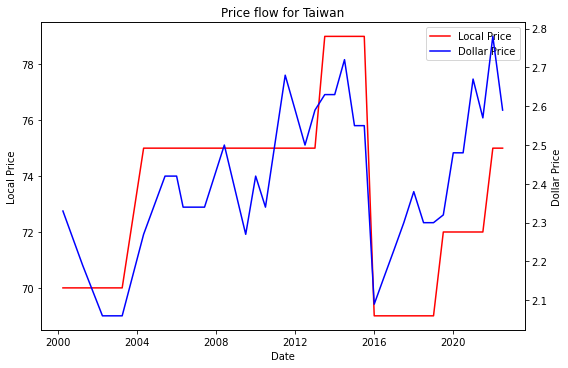

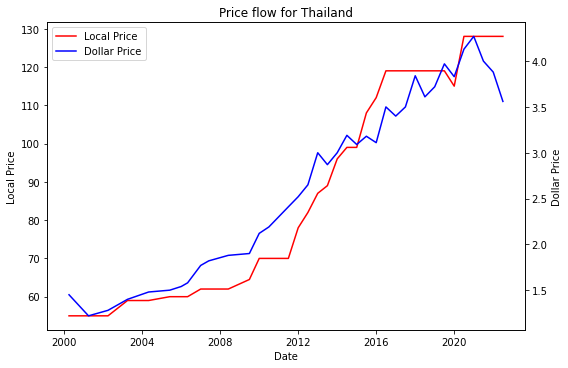

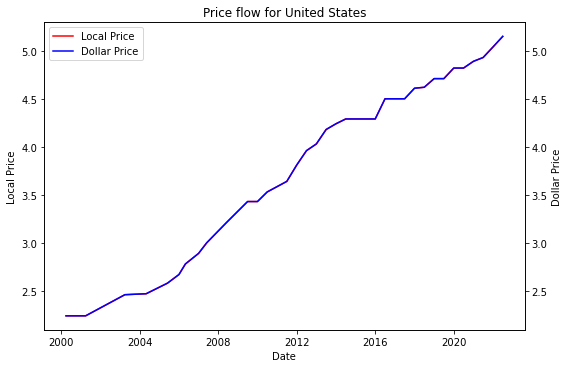

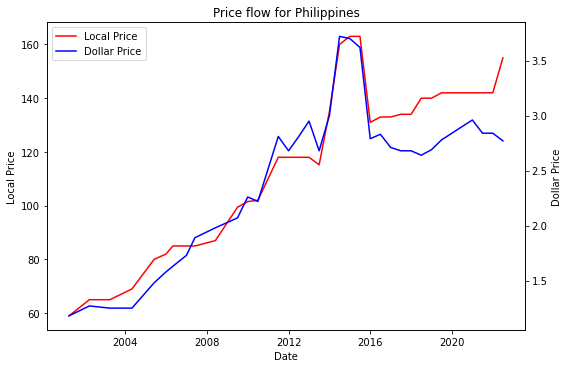

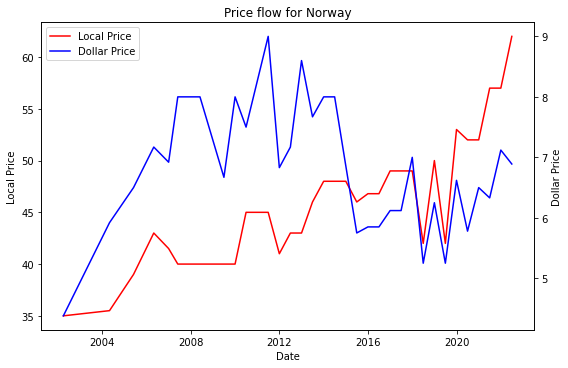

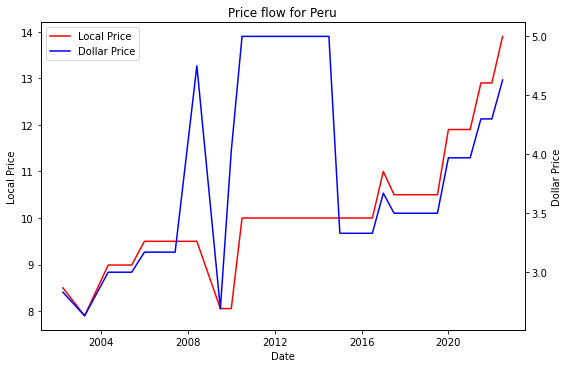

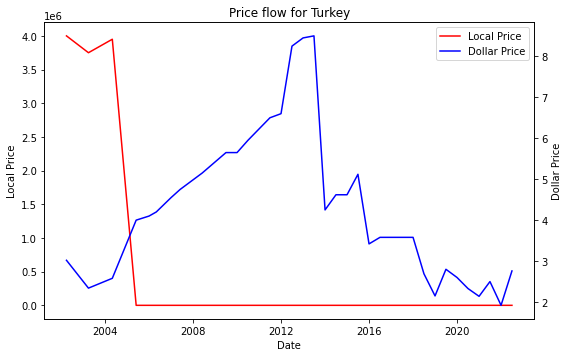

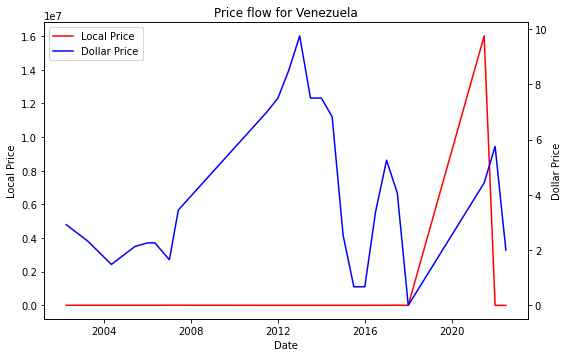

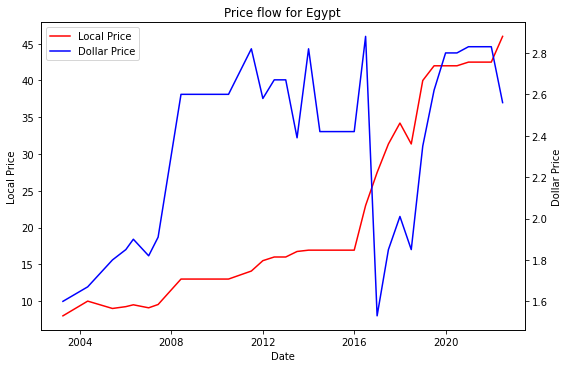

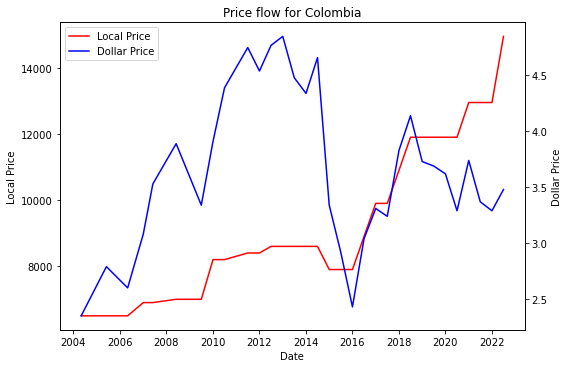

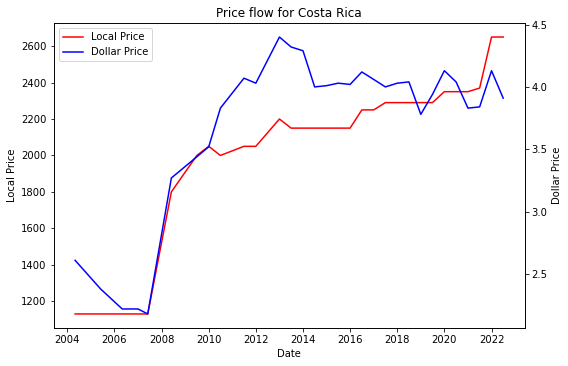

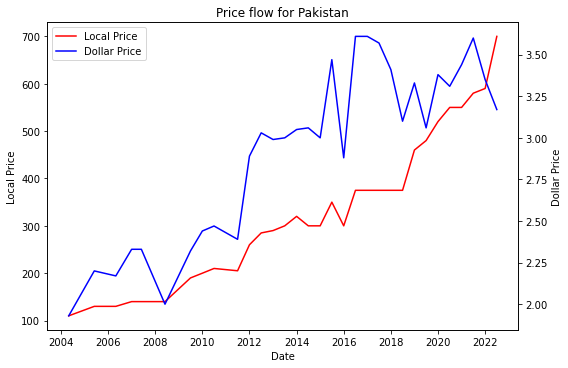

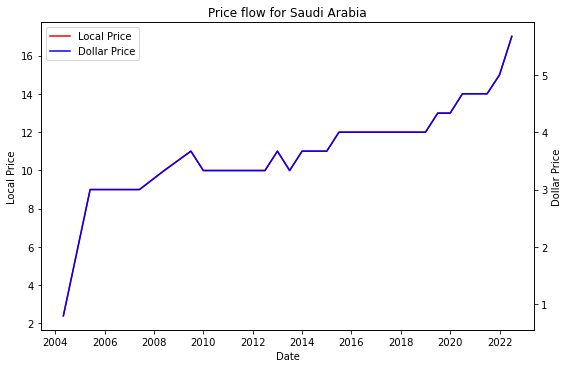

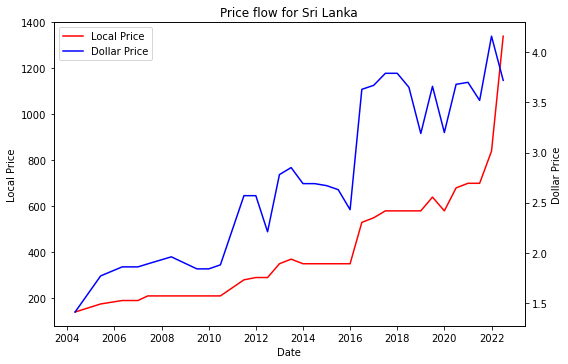

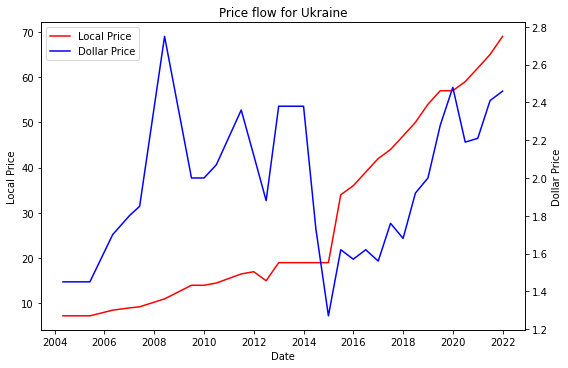

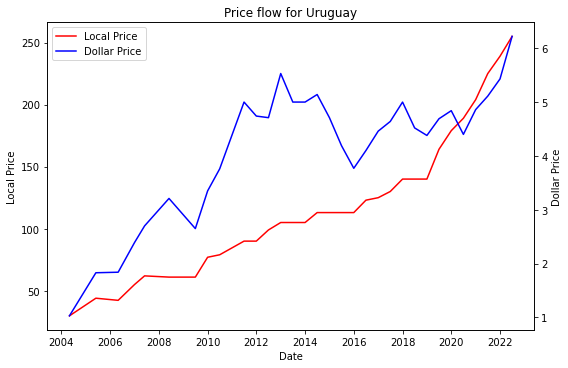

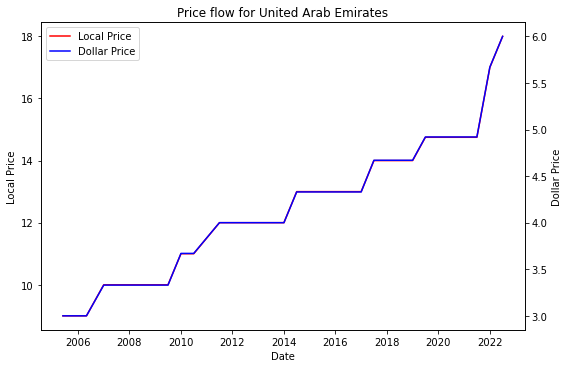

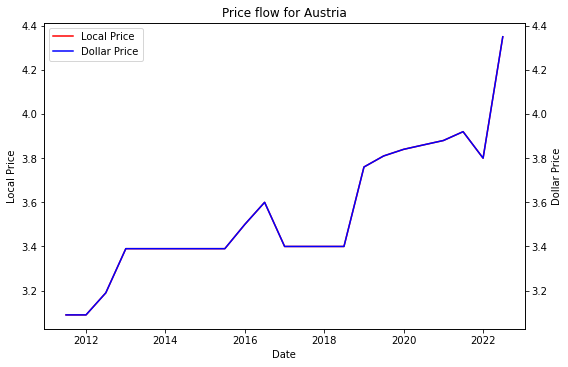

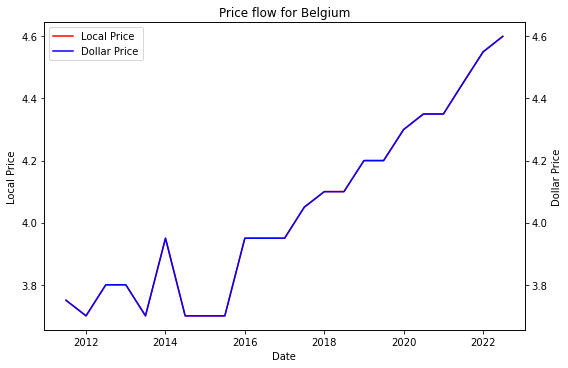

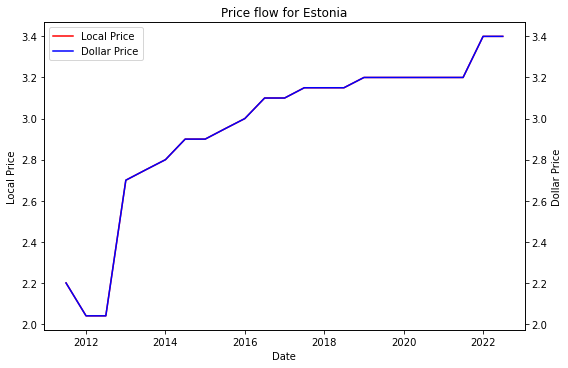

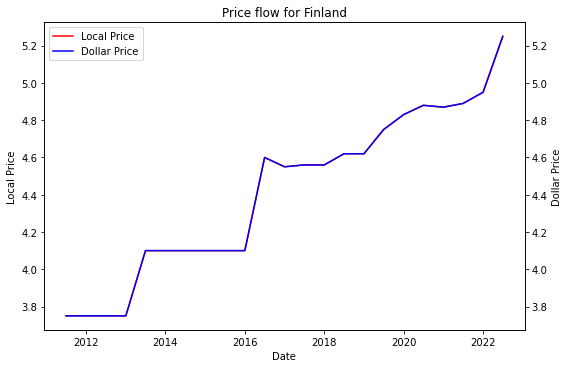

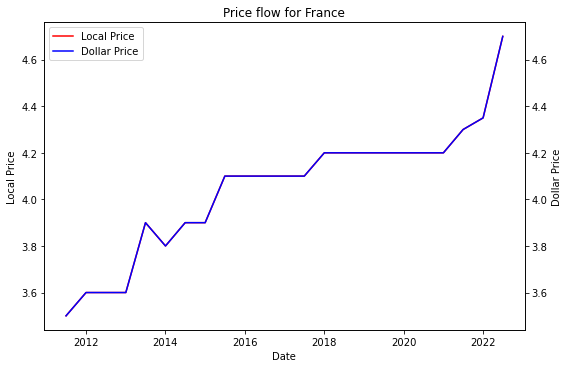

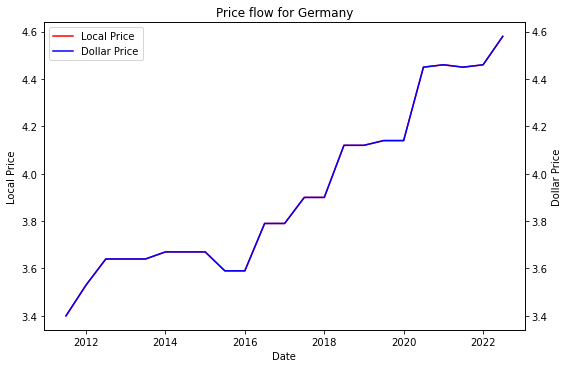

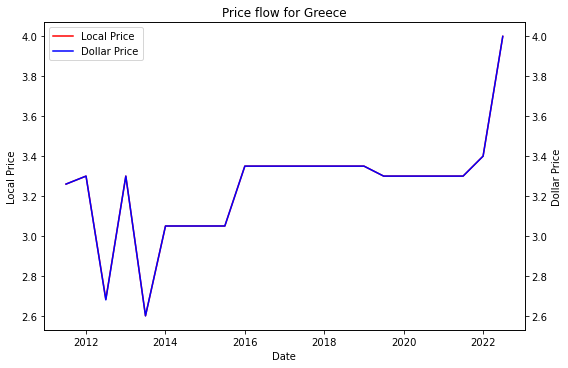

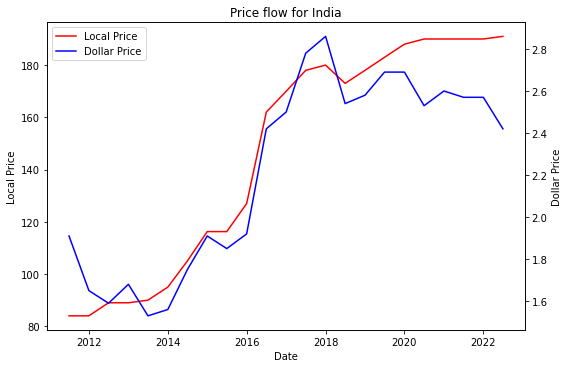

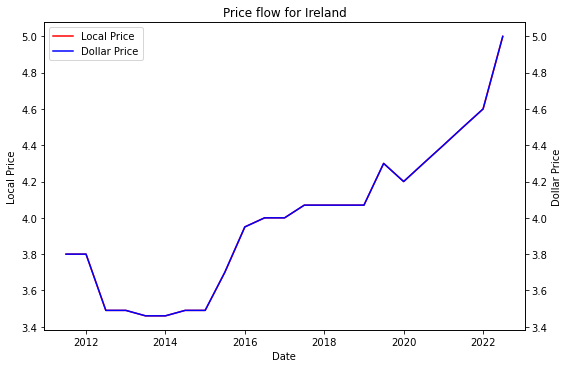

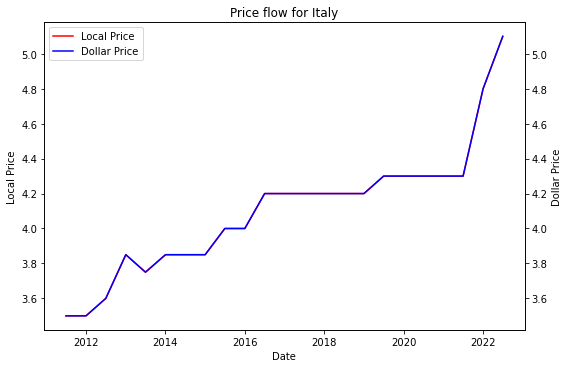

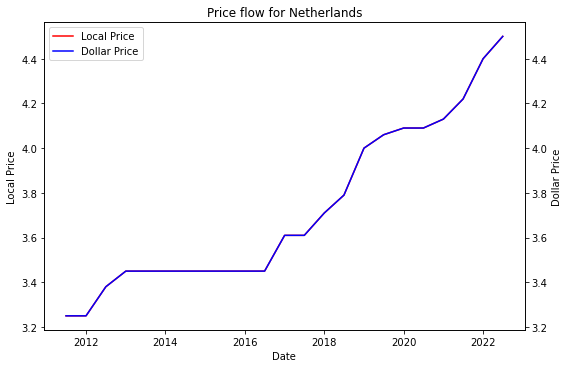

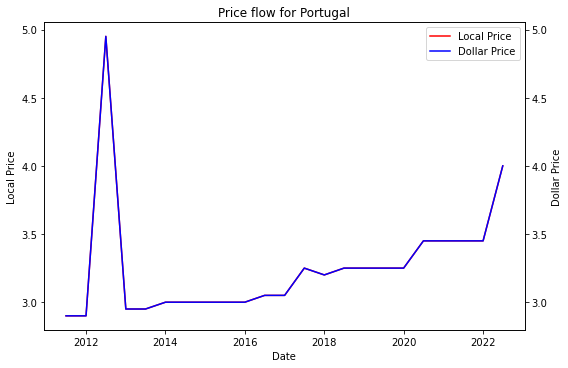

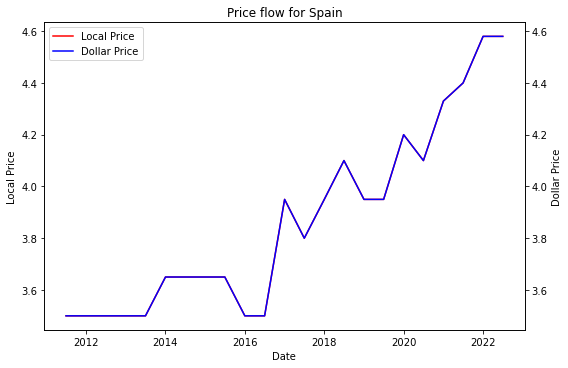

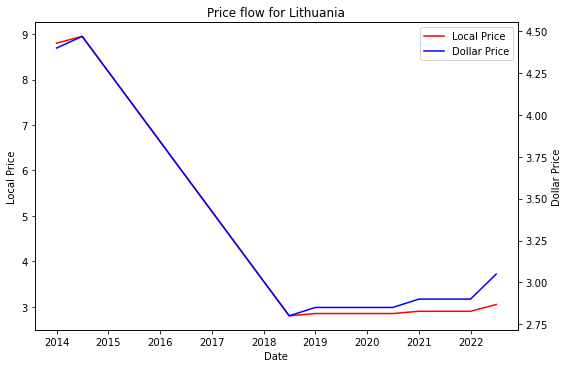

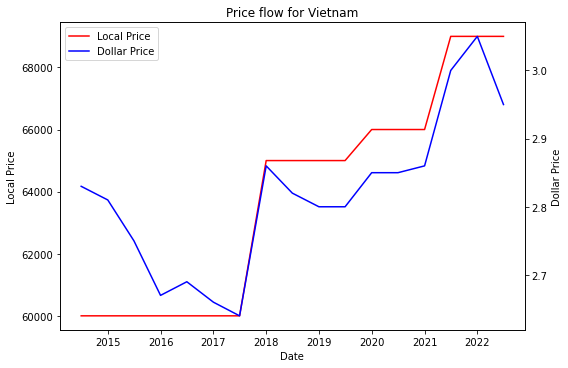

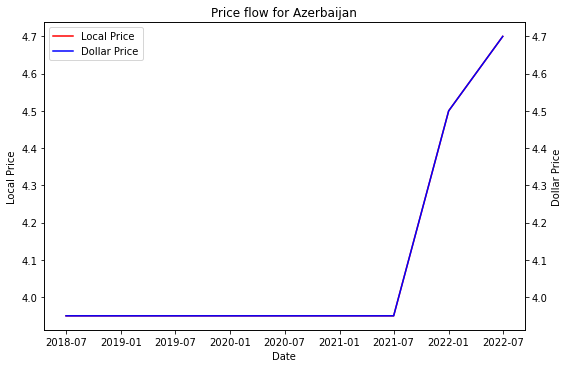

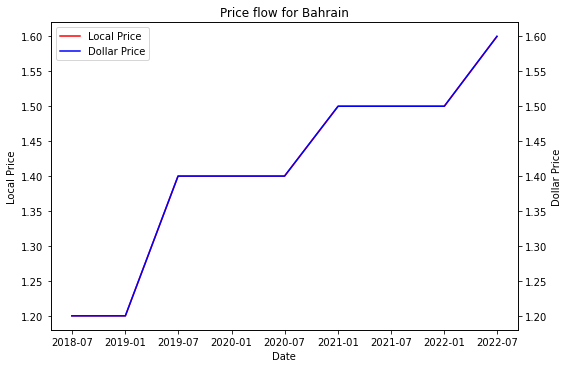

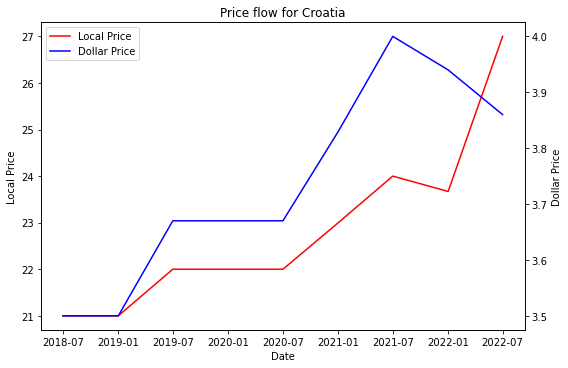

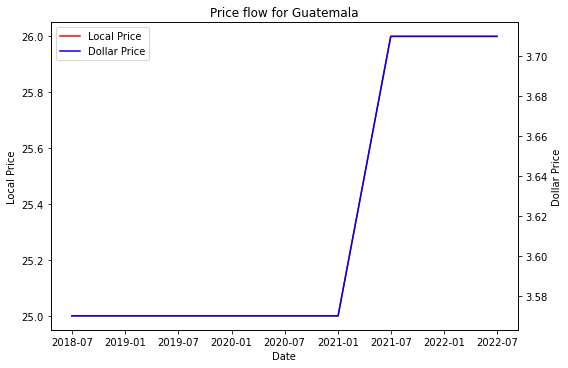

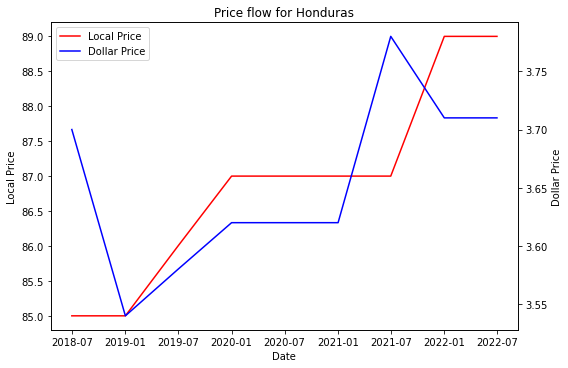

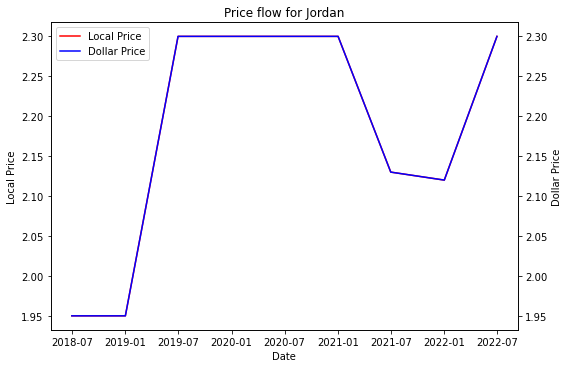

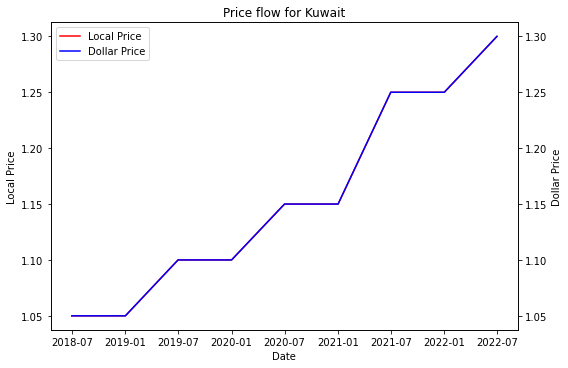

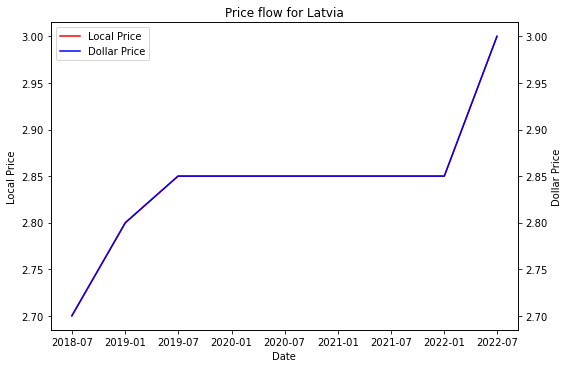

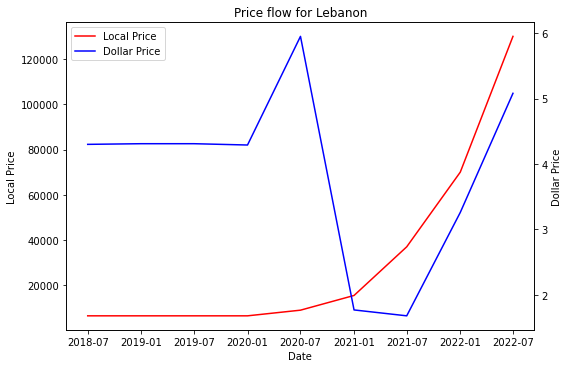

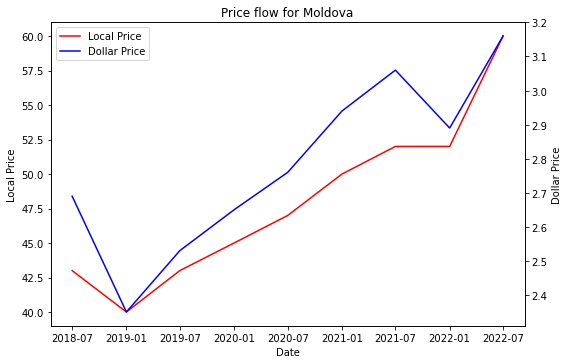

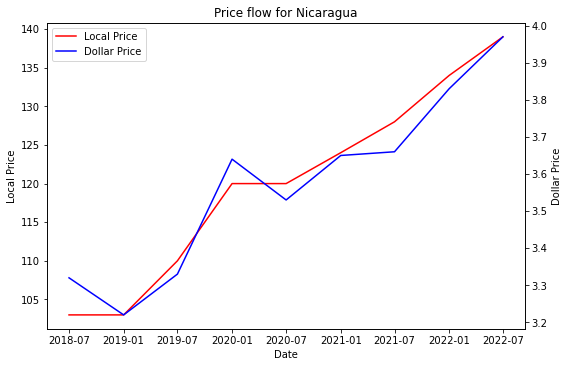

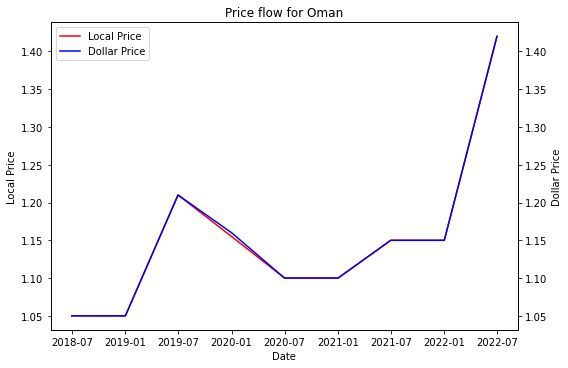

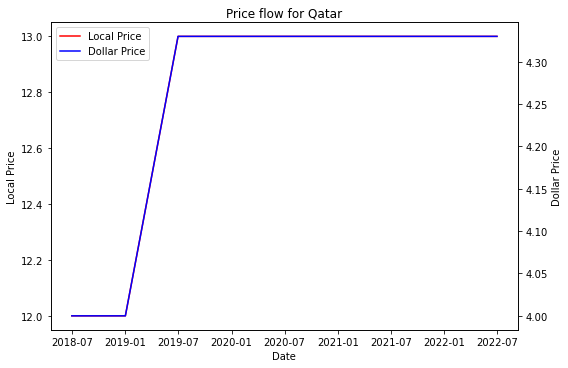

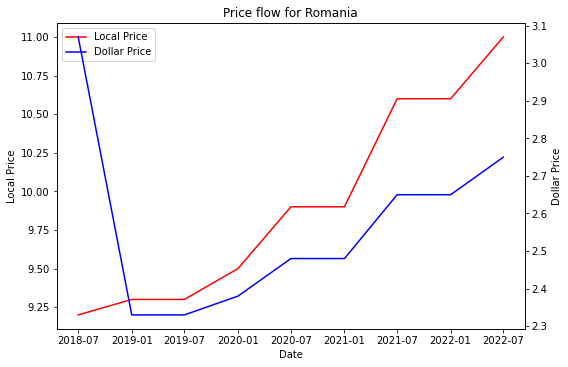

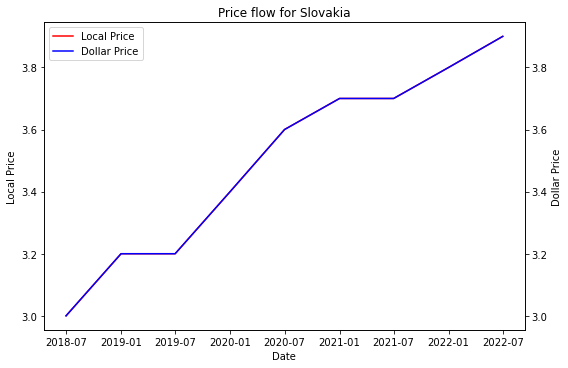

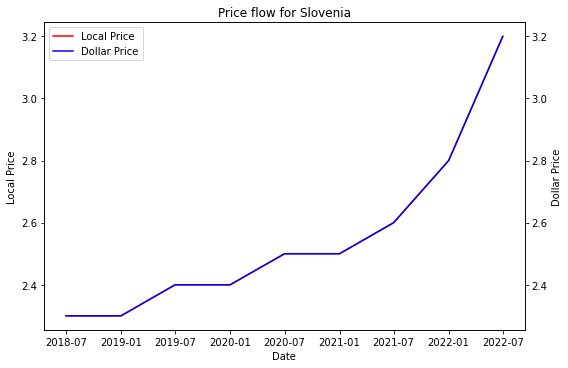

In [56]:
for c in df.country.unique():
    x = df.set_index('date')
    x = x[x['country'] == c]

    # More versatile wrapper
    fig, host = plt.subplots(figsize=(8,5)) # (width, height) in inches
    # (see https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html)

    par1 = host.twinx()

    host.set_xlabel("Date")
    host.set_ylabel("Local Price")
    par1.set_ylabel("Dollar Price")


    p1, = host.plot(x.index, x.local_price, label="Local Price", color='red')
    p2, = par1.plot(x.index, x.dollar_price, label="Dollar Price", color = 'blue')

    lns = [p1, p2]
    host.legend(handles=lns, loc='best')

    # Adjust spacings w.r.t. figsize
    fig.tight_layout()
    plt.title(f'Price flow for {c}')
    # Best for professional typesetting, e.g. LaTeX
    plt.plot()